In [48]:
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB 

from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix   
from sklearn.metrics import multilabel_confusion_matrix

from scipy.sparse import csr_matrix
from scipy.sparse import hstack

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.text import Tokenizer, text_to_word_sequence

from keras.preprocessing import sequence

from keras.models import Sequential

from keras.layers import InputLayer, Input, Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D

from IPython.display import SVG, Image

from keras.utils import model_to_dot
from keras.utils import plot_model

In [2]:
# Display setting to show more characters
pd.options.display.max_colwidth = 999
pd.options.display.max_rows = 999

In [3]:
df = pd.read_csv("C:/Users/User/OneDrive - Singapore Management University/YALING SMU MITB/10 APPLIED MACHINE LEARNING/Project/Latest Consolidated/sampdf_feat.csv") 

In [4]:
df.shape

(54870, 19)

In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,cleaned_comment_text,word_count,char_count,word_density,total_length,capitals,caps_vs_length,num_exclamation_marks,num_unique_words,words_vs_unique
0,3bf7c95e20e164f1,"you do interesting work! \n\nReally, whatever the outcome on Aetherometry, all the best with your wheelchair work. That looks like fascinating engineering.",0,0,0,0,0,0,1,interest work ! Really whatever outcome Aetherometry best wheelchair work That look like fascinate engineer,15,93,0.159574,107,3,0.028037,1,14,0.933333
1,8dfbb26d7edb4e39,"Let me see if I understand you. Because the site is run by religious, nationalistic Iranians, it must have stolen all its content? This must be some bizarro-world logic I'm not familiar with.",0,0,0,0,0,0,1,Let see I understand you Because site run religious nationalistic Iranians must steal content This must bizarro world logic I familiar with,22,118,0.184874,139,6,0.043165,0,20,0.909091
2,ec8eb2974a3b7686,"Yes, I will try to cut out the details to make it more compact.",0,0,0,0,0,0,1,Yes I try cut detail make compact,7,27,0.250000,33,2,0.060606,0,7,1.000000
3,587075cbd150aee1,"timestamp to unsigned templates, so you do it for me. Thanks! ) t c 03:08, 25",0,0,0,0,0,0,1,timestamp unsigned templates me Thanks ! c,7,36,0.189189,42,1,0.023810,1,7,1.000000
4,d8d76d16e8369ff8,"I replaced the quote as to my count three contributers seem to have been happy with the quote, i.e. a consensus within the terms of the page. It may be an idea with anything as contentious as articles that address issues surrounding the troubles to fully reference everything according to wiki standards.",0,0,0,0,0,0,1,I replace quote count three contributers seem happy quote i e consensus within term page It may idea anything contentious article address issue surround trouble fully reference everything accord wiki standards,31,179,0.172222,209,2,0.009569,0,30,0.967742


In [6]:
# subset the dataframe
# df1 = df.iloc[:,[0,9,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18]]
# df1 = df.iloc[:,[0,9,2,3,4,5,6,7]]
df1 = df.iloc[:,[0,9,2]]

In [7]:
df1.head()

,id,cleaned_comment_text,toxic
0,3bf7c95e20e164f1,interest work ! Really whatever outcome Aetherometry best wheelchair work That look like fascinate engineer,0
1,8dfbb26d7edb4e39,Let see I understand you Because site run religious nationalistic Iranians must steal content This must bizarro world logic I familiar with,0
2,ec8eb2974a3b7686,Yes I try cut detail make compact,0
3,587075cbd150aee1,timestamp unsigned templates me Thanks ! c,0
4,d8d76d16e8369ff8,I replace quote count three contributers seem happy quote i e consensus within term page It may idea anything contentious article address issue surround trouble fully reference everything accord wiki standards,0


In [8]:
df2 = df.iloc[:,[9,2]]

In [9]:
df2.head()

,cleaned_comment_text,toxic
0,interest work ! Really whatever outcome Aetherometry best wheelchair work That look like fascinate engineer,0
1,Let see I understand you Because site run religious nationalistic Iranians must steal content This must bizarro world logic I familiar with,0
2,Yes I try cut detail make compact,0
3,timestamp unsigned templates me Thanks ! c,0
4,I replace quote count three contributers seem happy quote i e consensus within term page It may idea anything contentious article address issue surround trouble fully reference everything accord wiki standards,0


In [10]:
df3 = df.iloc[:,[0,9,2,3,4,5,6,7]]

In [11]:
df3.head()

,id,cleaned_comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,3bf7c95e20e164f1,interest work ! Really whatever outcome Aetherometry best wheelchair work That look like fascinate engineer,0,0,0,0,0,0
1,8dfbb26d7edb4e39,Let see I understand you Because site run religious nationalistic Iranians must steal content This must bizarro world logic I familiar with,0,0,0,0,0,0
2,ec8eb2974a3b7686,Yes I try cut detail make compact,0,0,0,0,0,0
3,587075cbd150aee1,timestamp unsigned templates me Thanks ! c,0,0,0,0,0,0
4,d8d76d16e8369ff8,I replace quote count three contributers seem happy quote i e consensus within term page It may idea anything contentious article address issue surround trouble fully reference everything accord wiki standards,0,0,0,0,0,0


In [12]:
df4 = df3[df3['toxic']==1]

In [13]:
df4.head()

,id,cleaned_comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
32403,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
32404,0005c987bdfc9d4b,Hey it talk What it exclusive group WP TALIBANS who good destroy self appoint purist GANG UP one ask question abt ANTI SOCIAL DESTRUCTIVE non contribution WP Ask Sityush clean behavior issue nonsensical warn,1,0,0,0,0,0
32405,0007e25b2121310b,Bye ! Do look come think comming back ! Tosser,1,0,0,0,0,0
32406,001810bf8c45bf5f,You gay antisemmitian Archangel WHite Tiger Meow ! Greetingshhh ! Uh two ways erase comment WW holocaust brutally slay Jews gays Gypsys Slavs anyone If anti semitian shave head bald go skinhead meet ! If doubt word Bible homosexuality deadly sin make pentagram tatoo forehead go satanistic mass gay pal ! First last warn fuck gay I wo appreciate nazi shwain would write page ! I wish talk anymore ! Beware Dark Side !,1,0,1,0,1,1
32407,00190820581d90ce,FUCK YOUR FILTHY MOTHER IN THE ASS DRY !,1,0,1,0,1,0


### Train / Test Split: 1st-level

In [14]:
# create train and test set
train, test = train_test_split(df1, test_size = 0.2, random_state = 2019)

In [15]:
train.head(2)

,id,cleaned_comment_text,toxic
6902,737becdcbbdb26e0,It certainly refer distinction find within language,0
38124,95610e068ba8cef7,Listen fuckers dont come say shit face,1


In [16]:
test.head(2)

,id,cleaned_comment_text,toxic
18383,c18844370ce4a022,sound excat tide fat roll guy must guy jeez fuck wikapeida commies,0
27385,25b14fc6b4548258,Hi I flatter ask take look though article something I absolutely knowledge ! On first read seem well write article appropriate reference support claim The comment I express date term BP Before Present rather term BC even BCE I confess I never see BP before ! As possible tautology I convince It appear me read well enough be I would certainly encourage crack Hope use ! Cheers,0


In [17]:
# create train and test set
x_train, x_test, y_train, y_test = train_test_split(df2.iloc[:,0:1], df2.iloc[:,1:2], test_size = 0.2, random_state = 2019)

In [18]:
x_train.shape

(43896, 1)

In [19]:
x_train.head(2)

,cleaned_comment_text
6902,It certainly refer distinction find within language
38124,Listen fuckers dont come say shit face


In [20]:
x_test.shape

(10974, 1)

In [21]:
x_test.head(2)

,cleaned_comment_text
18383,sound excat tide fat roll guy must guy jeez fuck wikapeida commies
27385,Hi I flatter ask take look though article something I absolutely knowledge ! On first read seem well write article appropriate reference support claim The comment I express date term BP Before Present rather term BC even BCE I confess I never see BP before ! As possible tautology I convince It appear me read well enough be I would certainly encourage crack Hope use ! Cheers


In [22]:
y_train.head(2)

,toxic
6902,0
38124,1


In [23]:
y_test.head(2)

,toxic
18383,0
27385,0


In [24]:
x_train1 = [doc for doc in x_train['cleaned_comment_text']]
x_train1[0:5]

['It certainly refer distinction find within language',
 'Listen fuckers dont come say shit face',
 'Building encyclopedia Glad back Take care fun',
 'Awesome Quote Not idiots boys boys idiots ! !',
 'The term Bathroom use basically apply room actually bath or alternatively shower both it For toilet call list things toilet dunny John shithouse commode essentially name except bathroom Curse word generally same although couple soften blow Bugger still rude notably less rude word For full list Australian slang check page lot things help But since Steve Irwin normal Australian use word Crikey Thanks link Fantastic !']

In [25]:
x_test1 = [doc for doc in x_test['cleaned_comment_text']]
x_test1[0:5]

['sound excat tide fat roll guy must guy jeez fuck wikapeida commies',
 'Hi I flatter ask take look though article something I absolutely knowledge ! On first read seem well write article appropriate reference support claim The comment I express date term BP Before Present rather term BC even BCE I confess I never see BP before ! As possible tautology I convince It appear me read well enough be I would certainly encourage crack Hope use ! Cheers',
 'Sure thingthanks make look twice As MagicView say I mean much better much appropriate tone I admire patience',
 're Gates What diff go make talk technical reason',
 'Oppose per Vegaswikian I never hear book hear plenty people give name There also Ian McKellen film call Emile really legitimate reason make move']

### Train / Test Split: 2nd-level

In [26]:
# create train and test set
x_train_toxic, x_test_toxic, y_train_toxic, y_test_toxic = train_test_split(df4.iloc[:,1:2], df4.iloc[:,3:8], test_size = 0.2, random_state = 2019)

In [27]:
x_train_toxic.head(2)

,cleaned_comment_text
39367,When fagot decide edit wikipedia tough call edit tattoo word loser forehead Tattoo might less embarrass Later asslickers
40315,SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK !


In [28]:
x_train_toxic1 = [doc for doc in x_train_toxic['cleaned_comment_text']]
x_train_toxic1[0:5]

['When fagot decide edit wikipedia tough call edit tattoo word loser forehead Tattoo might less embarrass Later asslickers',
 'SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK ! SHOOT YOURSELF YOU FREAK !',
 'I improve encyclopedia insist palestine exist Jerusalem belong it You come quite combative inthis post I apprecia

In [29]:
x_test_toxic.head(2)

,cleaned_comment_text
47295,I HATE VEGANS AND I HATE YOU
34487,The Brits generally dumber Yanks basically fish chip goobers Russians smartest all especially cultural things You seem like good guy although picture strange hell With face like that I would want date sister hell I would want date german shepherd LOL


In [30]:
x_test_toxic1 = [doc for doc in x_test_toxic['cleaned_comment_text']]
x_test_toxic1[0:5]

['I HATE VEGANS AND I HATE YOU',
 'The Brits generally dumber Yanks basically fish chip goobers Russians smartest all especially cultural things You seem like good guy although picture strange hell With face like that I would want date sister hell I would want date german shepherd LOL',
 'Three tits ! Hah !',
 'My stupid ex room mate get block',
 'IM IN YOUR AREA I go find I find I teach swim']

In [31]:
y_train_toxic.head(2)

,severe_toxic,obscene,threat,insult,identity_hate
39367,0,1,0,1,0
40315,0,0,0,1,0


In [32]:
y_test_toxic.head(2)

,severe_toxic,obscene,threat,insult,identity_hate
47295,0,0,0,1,1
34487,0,0,0,1,0


### feature engineering: 1st-level

In [21]:
tokenizer = Tokenizer(num_words=5000, 
                      filters='"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', # omit !
                      lower=False, 
                      char_level=False,
                      oov_token=True) # reserve token for unknown words in test set

tokenizer.fit_on_texts(['FFFFF Listen fuckers dont come say shit face !']) 
print(tokenizer.texts_to_sequences(['FFFFF Listen fuckers dont come say shit face !'])) 

print(tokenizer.word_index)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

[[2, 3, 4, 5, 6, 7, 8, 9, 10]]
{True: 1, 'FFFFF': 2, 'Listen': 3, 'fuckers': 4, 'dont': 5, 'come': 6, 'say': 7, 'shit': 8, 'face': 9, '!': 10}
11


In [22]:
tokenizer = Tokenizer(num_words=5000, 
                      filters='"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', # omit !
                      lower=False, 
                      char_level=False,
                      oov_token=True) # reserve token for unknown words in test set

tokenizer.fit_on_texts(['FFFFF Listen fuckers dont come say shit face !']) 
print(tokenizer.texts_to_matrix(['FFFFF Listen fuckers dont come say shit face !'], mode='tfidf')) 

print(tokenizer.word_index)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

[[0.         0.         0.40546511 ... 0.         0.         0.        ]]
{True: 1, 'FFFFF': 2, 'Listen': 3, 'fuckers': 4, 'dont': 5, 'come': 6, 'say': 7, 'shit': 8, 'face': 9, '!': 10}
11


In [23]:
# texts_to_sequences
tokenizer = Tokenizer(num_words=None, 
                      filters='"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', # omit !
                      lower=False, 
                      char_level=False,
                      oov_token=True) # reserve token for unknown words in test set

tokenizer.fit_on_texts(x_train1)

x_train_s1 = tokenizer.texts_to_sequences(x_train1)
x_test_s1 = tokenizer.texts_to_sequences(x_test1)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

print(x_train1[0])
print(x_train_s1[0])

91191
It certainly refer distinction find within language
[27, 622, 336, 2746, 45, 599, 375]


In [33]:
# texts_to_matrix
tokenizer = Tokenizer(num_words=10000, 
                      filters='"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', # omit !
                      lower=False, 
                      char_level=False,
                      oov_token=True) # reserve token for unknown words in test set

tokenizer.fit_on_texts(x_train1)

x_train_m1 = tokenizer.texts_to_matrix(x_train1, mode='tfidf')
x_test_m1 = tokenizer.texts_to_matrix(x_test1, mode='tfidf')

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

print(x_train1[0])
print(x_train_m1[0])

91191
It certainly refer distinction find within language
[0. 0. 0. ... 0. 0. 0.]


In [185]:
# texts_to_matrix
tokenizer = Tokenizer(num_words=10000, 
                      filters='"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', # omit !
                      lower=False, 
                      char_level=False,
                      oov_token=True) # reserve token for unknown words in test set

tokenizer.fit_on_texts(x_train1)

x_train_m3 = tokenizer.texts_to_matrix(x_train1, mode='count')
x_test_m3 = tokenizer.texts_to_matrix(x_test1, mode='count')

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

print(x_train1[0])
print(x_train_m3[0])

91191
It certainly refer distinction find within language
[0. 0. 0. ... 0. 0. 0.]


In [26]:
# pad_sequences
maxlen = 5000 # len of longest comment

x_train_s2 = sequence.pad_sequences(x_train_s1, padding='post', maxlen=maxlen)
x_test_s2 = sequence.pad_sequences(x_test_s1, padding='post', maxlen=maxlen)

In [27]:
print(x_train_s2[0])

[ 27 622 336 ...   0   0   0]


In [34]:
y_train = np.array(y_train)
y_train

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [35]:
y_test = np.array(y_test)
y_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

### 1st level classification: binary

### texts_to_matrix (tfidf) -> Conv1D

In [36]:
x_train_m2 = x_train_m1.reshape(x_train_m1.shape[0], x_train_m1.shape[1], 1)

In [37]:
x_train_m2.shape

(43896, 10000, 1)

In [38]:
x_train_m2[0]

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [39]:
x_test_m2 = x_test_m1.reshape(x_test_m1.shape[0], x_test_m1.shape[1], 1)

In [40]:
x_test_m2.shape

(10974, 10000, 1)

In [41]:
y_train.shape

(43896, 1)

In [42]:
filters = 128
kernel_size = 5

inputs = keras.Input(shape=(10000,1), name='matrix_text')
x = layers.Conv1D(filters, kernel_size, activation='relu')(inputs)
x = layers.GlobalMaxPooling1D()(x)
branch1_output = layers.Flatten()(x)
x = layers.Flatten()(inputs)
branch2_output = layers.Dense(32, activation='relu')(x)
x = layers.concatenate([branch1_output, branch2_output])
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='matrix_model')
model.summary()

Model: "matrix_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
matrix_text (InputLayer)        [(None, 10000, 1)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 9996, 128)    768         matrix_text[0][0]                
__________________________________________________________________________________________________
global_max_pooling1d (GlobalMax (None, 128)          0           conv1d[0][0]                     
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 10000)        0           matrix_text[0][0]                
_______________________________________________________________________________________

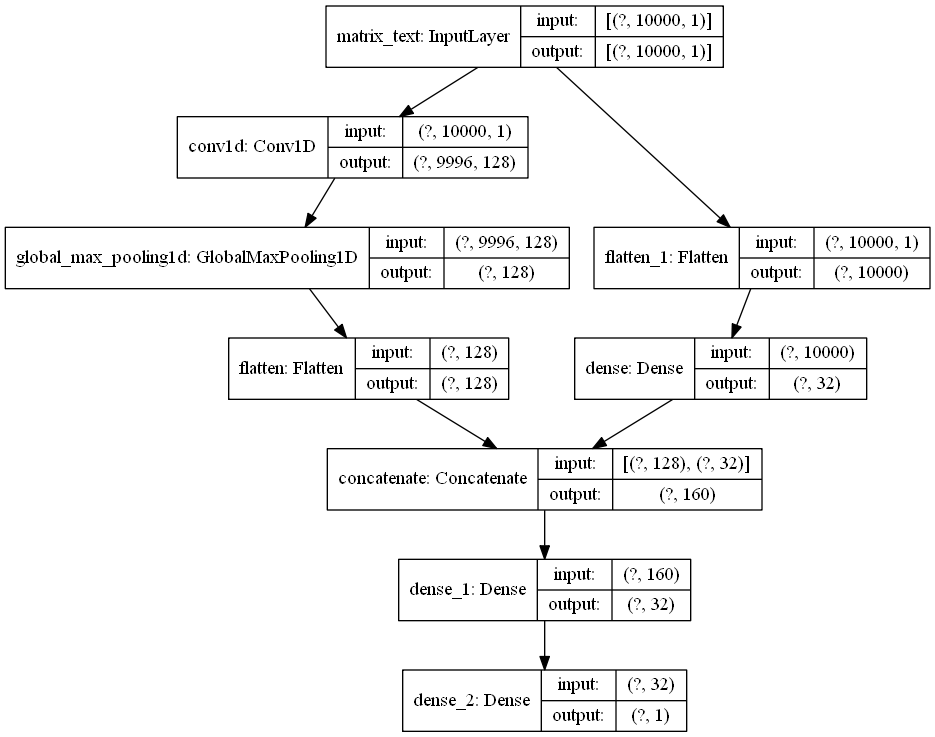

In [43]:
keras.utils.plot_model(model, 'matrix_model.png', show_shapes=True)

In [44]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 32
epochs = 2

history = model.fit(x_train_m2, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)

test_scores = model.evaluate(x_test_m2, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Train on 35116 samples, validate on 8780 samples
Epoch 1/2
35116/35116 [==============================] - 669s 19ms/sample - loss: 0.3459 - accuracy: 0.8595 - val_loss: 0.3058 - val_accuracy: 0.8707
Epoch 2/2
35116/35116 [==============================] - 651s 19ms/sample - loss: 0.1795 - accuracy: 0.9266 - val_loss: 0.3434 - val_accuracy: 0.8793
10974/1 - 79s - loss: 0.2662 - accuracy: 0.8806
Test loss: 0.3343006690761442
Test accuracy: 0.8806269


In [45]:
y_pred = model.predict(x_test_m2)

In [46]:
y_pred1 = np.round(y_pred).astype(int)

In [49]:
# evaluate performance   
print('\nConfusion matrix:\n', confusion_matrix(y_test, y_pred1))
print('\nAccuracy: {}%'.format(round(100*accuracy_score(y_test, y_pred1),2)))
print('\nPrecision: {}%'.format(round(100*precision_score(y_test, y_pred1),2)))
print('\nRecall: {}%'.format(round(100*recall_score(y_test, y_pred1),2)))
print('\nf1-score: {}%'.format(round(100*f1_score(y_test, y_pred1),2)))
print('\nClasification report:\n', classification_report(y_test, y_pred1))

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred1, beta=1, average='weighted')
print(precision, recall, f1_score, support)


Confusion matrix:
 [[6145  584]
 [ 726 3519]]

Accuracy: 88.06%

Precision: 85.77%

Recall: 82.9%

f1-score: 84.31%

Clasification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      6729
           1       0.86      0.83      0.84      4245

    accuracy                           0.88     10974
   macro avg       0.88      0.87      0.87     10974
weighted avg       0.88      0.88      0.88     10974

0.8801523944811803 0.8806269363951157 0.8802348623827267 None


### 2nd level classification: multi-label

### feature engineering: 2nd-level

In [476]:
# texts_to_matrix
tokenizer = Tokenizer(num_words=1000, 
                      filters='"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', # omit !
                      lower=False, 
                      char_level=False,
                      oov_token=True) # reserve token for unknown words in test set

tokenizer.fit_on_texts(x_train_toxic1)

x_train_toxic_m1 = tokenizer.texts_to_matrix(x_train_toxic1, mode='tfidf')
x_test_toxic_m1 = tokenizer.texts_to_matrix(x_test_toxic1, mode='tfidf')

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

print(x_train_toxic1[0])
print(x_train_toxic_m1[0])

41126
When fagot decide edit wikipedia tough call edit tattoo word loser forehead Tattoo might less embarrass Later asslickers
[ 0.         30.01606506  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          4.4444277   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  3.25562657  0.          0.

In [477]:
x_train_toxic_m2 = x_train_toxic_m1.reshape(x_train_toxic_m1.shape[0], x_train_toxic_m1.shape[1], 1)
x_train_toxic_m2.shape

(17106, 1000, 1)

In [478]:
x_train_toxic_m2[0]

array([[ 0.        ],
       [30.01606506],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 4.4444277 ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0

In [479]:
x_test_toxic_m2 = x_test_toxic_m1.reshape(x_test_toxic_m1.shape[0], x_test_toxic_m1.shape[1], 1)
x_test_toxic_m2.shape

(4277, 1000, 1)

In [480]:
filters = 128
kernel_size = 5

inputs = keras.Input(shape=(1000,1), name='multilabel')
x = layers.Conv1D(filters, kernel_size, activation='relu')(inputs)
x = layers.GlobalMaxPooling1D()(x)
branch1_output = layers.Flatten()(x)
x = layers.Flatten()(inputs)
branch2_output = layers.Dense(32, activation='relu')(x)
x = layers.concatenate([branch1_output, branch2_output])
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(5, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, 
                    outputs=outputs, 
                    name='multilabel_model')
model.summary()

Model: "multilabel_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
multilabel (InputLayer)         [(None, 1000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_35 (Conv1D)              (None, 996, 128)     768         multilabel[0][0]                 
__________________________________________________________________________________________________
global_max_pooling1d_30 (Global (None, 128)          0           conv1d_35[0][0]                  
__________________________________________________________________________________________________
flatten_56 (Flatten)            (None, 1000)         0           multilabel[0][0]                 
___________________________________________________________________________________

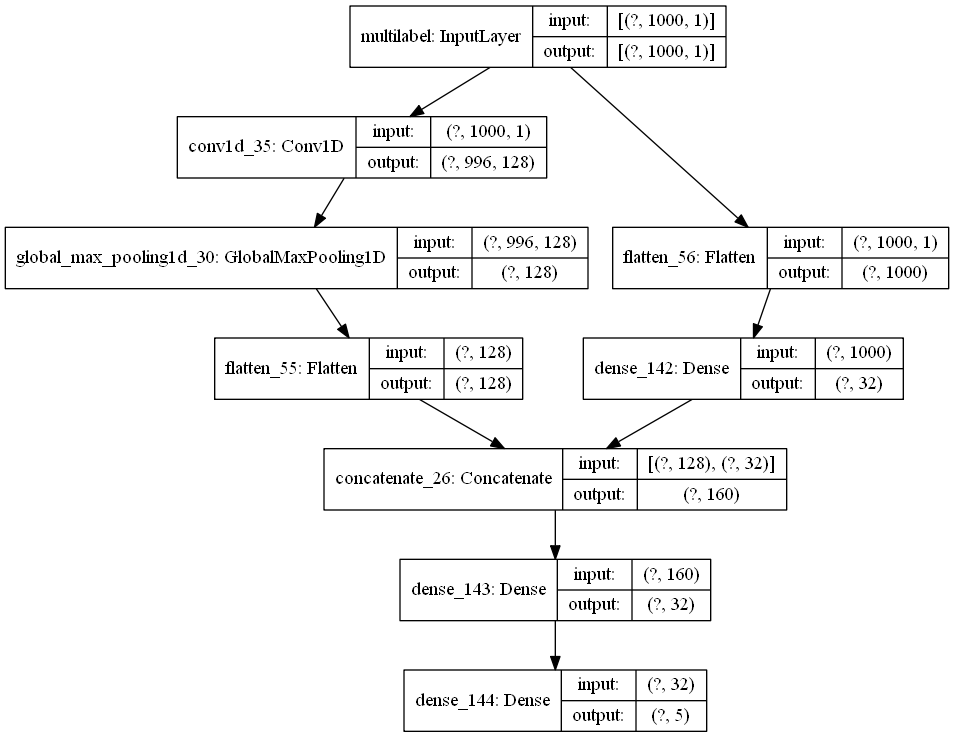

In [481]:
keras.utils.plot_model(model, 'multilabel_model.png', show_shapes=True)

In [482]:
y_train_toxic.values

array([[0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0],
       ...,
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 1, 0, 1, 0]], dtype=int64)

In [483]:
y_test_toxic.values

array([[0, 0, 0, 1, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0]], dtype=int64)

In [484]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 32
epochs = 2

history = model.fit(x=x_train_toxic_m2, 
                    y=y_train_toxic.values,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)

test_scores = model.evaluate(x=x_test_toxic_m2, 
                             y=y_test_toxic.values,
                             verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Train on 13684 samples, validate on 3422 samples
Epoch 1/2
13684/13684 [==============================] - 15s 1ms/sample - loss: 0.3999 - accuracy: 0.8202 - val_loss: 0.3436 - val_accuracy: 0.8527
Epoch 2/2
13684/13684 [==============================] - 16s 1ms/sample - loss: 0.3181 - accuracy: 0.8630 - val_loss: 0.3224 - val_accuracy: 0.8624
4277/1 - 2s - loss: 0.3631 - accuracy: 0.8620
Test loss: 0.32349683005368846
Test accuracy: 0.86200595


In [485]:
y_pred = model.predict(x_test_toxic_m2)

In [486]:
y_pred1 = np.round(y_pred).astype(int)

In [487]:
y_pred1.shape

(4277, 5)

In [488]:
y_pred1

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0]])

In [489]:
y_true = y_test_toxic.values
y_true

array([[0, 0, 0, 1, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0]], dtype=int64)

In [490]:
# confusion matrix
mcm = multilabel_confusion_matrix(y_true, y_pred1)
print(mcm)

[[[3810   71]
  [ 301   95]]

 [[1562  459]
  [ 444 1812]]

 [[4149   11]
  [ 111    6]]

 [[1673  486]
  [ 726 1392]]

 [[3884   10]
  [ 332   51]]]


In [491]:
# TP, FP, FN, TN

TP = list()
FP = list()
FN = list()
TN = list()

no_of_labels = 5

for i in range(no_of_labels):
    TN_i = mcm[i][0][0]
    FP_i = mcm[i][0][1]
    FN_i = mcm[i][1][0]
    TP_i = mcm[i][1][1]
    
    TP.append(TP_i)
    FP.append(FP_i)
    FN.append(FN_i)
    TN.append(TN_i)
    
print(TP)
print(FP)
print(FN)
print(TN)

# e.g. TP for label 0 ==> TP[0]

[95, 1812, 6, 1392, 51]
[71, 459, 11, 486, 10]
[301, 444, 111, 726, 332]
[3810, 1562, 4149, 1673, 3884]


In [492]:
# accuracy

accuracy = list()
for i in range(no_of_labels):
    accuracy_i = (TP[i] + TN[i]) / (TP[i] + FP[i] + FN[i] + TN[i])
    accuracy.append(accuracy_i)

print(accuracy)

[0.9130231470657002, 0.7888707037643208, 0.9714753331774608, 0.7166238017301847, 0.9200374093991115]


In [493]:
# average accuracy

avg_accuracy = sum(accuracy) / no_of_labels
print(avg_accuracy)

0.8620060790273556


In [494]:
# precision, recall, f1 score

precision = list()
recall = list()
f1_score = list()

for i in range(no_of_labels):
    precision_i = (TP[i]) / ((TP[i] + FP[i]) or not (TP[i] + FP[i]))
    precision.append(precision_i)
    
    recall_i = (TP[i]) / ((TP[i] + FN[i]) or not (TP[i] + FN[i]))
    recall.append(recall_i)
    
    f1_score_i = (2 * precision_i * recall_i) / ((precision_i + recall_i) or not (precision_i + recall_i))
    f1_score.append(f1_score_i)
    
print(precision)
print(recall)
print(f1_score)

[0.572289156626506, 0.797886393659181, 0.35294117647058826, 0.7412140575079872, 0.8360655737704918]
[0.2398989898989899, 0.8031914893617021, 0.05128205128205128, 0.6572237960339944, 0.13315926892950392]
[0.33807829181494664, 0.8005301524188204, 0.08955223880597016, 0.6966966966966968, 0.22972972972972974]


In [495]:
# micro averaging

micro_precision = sum(TP) / (sum(TP) + sum(FP))
micro_recall = sum(TP) / (sum(TP) + sum(FN))
micro_f1_score = (2 * micro_precision * micro_recall) / (micro_precision + micro_recall)

print(micro_precision)
print(micro_recall)
print(micro_f1_score)

0.763942636011837
0.6368121442125237
0.6946082996998861


In [436]:
# texts_to_matrix
tokenizer = Tokenizer(num_words=4000, 
                      filters='"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', # omit !
                      lower=False, 
                      char_level=False,
                      oov_token=True) # reserve token for unknown words in test set

tokenizer.fit_on_texts(x_train_toxic1)

x_train_toxic_m1 = tokenizer.texts_to_matrix(x_train_toxic1, mode='tfidf')
x_test_toxic_m1 = tokenizer.texts_to_matrix(x_test_toxic1, mode='tfidf')

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

print(x_train_toxic1[0])
print(x_train_toxic_m1[0])

41126
When fagot decide edit wikipedia tough call edit tattoo word loser forehead Tattoo might less embarrass Later asslickers
[ 0.         27.21195799  0.         ...  0.          0.
  0.        ]


In [437]:
x_train_toxic_m2 = x_train_toxic_m1.reshape(x_train_toxic_m1.shape[0], x_train_toxic_m1.shape[1], 1)
x_train_toxic_m2.shape

(17106, 4000, 1)

In [438]:
x_train_toxic_m2[0]

array([[ 0.        ],
       [27.21195799],
       [ 0.        ],
       ...,
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

In [439]:
x_test_toxic_m2 = x_test_toxic_m1.reshape(x_test_toxic_m1.shape[0], x_test_toxic_m1.shape[1], 1)
x_test_toxic_m2.shape

(4277, 4000, 1)

In [440]:
filters = 128
kernel_size = 5

inputs = keras.Input(shape=(4000,1), name='multilabel')
x = layers.Conv1D(filters, kernel_size, activation='relu')(inputs)
x = layers.GlobalMaxPooling1D()(x)
branch1_output = layers.Flatten()(x)
x = layers.Flatten()(inputs)
branch2_output = layers.Dense(32, activation='relu')(x)
x = layers.concatenate([branch1_output, branch2_output])
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(5, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, 
                    outputs=outputs, 
                    name='multilabel_model')
model.summary()

Model: "multilabel_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
multilabel (InputLayer)         [(None, 4000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_33 (Conv1D)              (None, 3996, 128)    768         multilabel[0][0]                 
__________________________________________________________________________________________________
global_max_pooling1d_28 (Global (None, 128)          0           conv1d_33[0][0]                  
__________________________________________________________________________________________________
flatten_52 (Flatten)            (None, 4000)         0           multilabel[0][0]                 
___________________________________________________________________________________

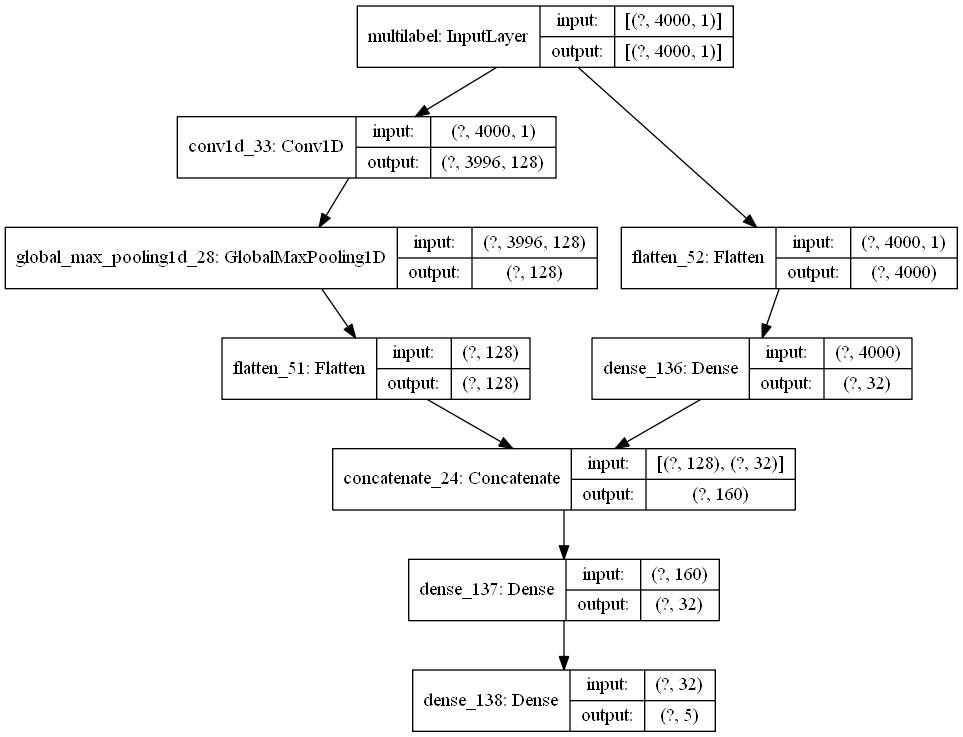

In [441]:
keras.utils.plot_model(model, 'multilabel_model.png', show_shapes=True)

In [442]:
y_train_toxic.values

array([[0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0],
       ...,
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 1, 0, 1, 0]], dtype=int64)

In [443]:
y_test_toxic.values

array([[0, 0, 0, 1, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0]], dtype=int64)

In [444]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 32
epochs = 2

history = model.fit(x=x_train_toxic_m2, 
                    y=y_train_toxic.values,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

test_scores = model.evaluate(x=x_test_toxic_m2, 
                             y=y_test_toxic.values,
                             verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Train on 15395 samples, validate on 1711 samples
Epoch 1/2
15395/15395 [==============================] - 67s 4ms/sample - loss: 0.4049 - accuracy: 0.8204 - val_loss: 0.3399 - val_accuracy: 0.8547
Epoch 2/2
15395/15395 [==============================] - 74s 5ms/sample - loss: 0.2877 - accuracy: 0.8775 - val_loss: 0.3185 - val_accuracy: 0.8627
4277/1 - 6s - loss: 0.3367 - accuracy: 0.8621
Test loss: 0.3218163372911748
Test accuracy: 0.8621463


In [445]:
y_pred = model.predict(x_test_toxic_m2)

In [446]:
y_pred1 = np.round(y_pred).astype(int)

In [447]:
y_pred1.shape

(4277, 5)

In [448]:
y_pred1

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0]])

In [449]:
y_true = y_test_toxic.values
y_true

array([[0, 0, 0, 1, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0]], dtype=int64)

In [450]:
# confusion matrix
mcm = multilabel_confusion_matrix(y_true, y_pred1)
print(mcm)

[[[3746  135]
  [ 267  129]]

 [[1546  475]
  [ 463 1793]]

 [[4137   23]
  [  98   19]]

 [[1601  558]
  [ 615 1503]]

 [[3826   68]
  [ 246  137]]]


In [451]:
# TP, FP, FN, TN

TP = list()
FP = list()
FN = list()
TN = list()

no_of_labels = 5

for i in range(no_of_labels):
    TN_i = mcm[i][0][0]
    FP_i = mcm[i][0][1]
    FN_i = mcm[i][1][0]
    TP_i = mcm[i][1][1]
    
    TP.append(TP_i)
    FP.append(FP_i)
    FN.append(FN_i)
    TN.append(TN_i)
    
print(TP)
print(FP)
print(FN)
print(TN)

# e.g. TP for label 0 ==> TP[0]

[129, 1793, 19, 1503, 137]
[135, 475, 23, 558, 68]
[267, 463, 98, 615, 246]
[3746, 1546, 4137, 1601, 3826]


In [452]:
# accuracy

accuracy = list()
for i in range(no_of_labels):
    accuracy_i = (TP[i] + TN[i]) / (TP[i] + FP[i] + FN[i] + TN[i])
    accuracy.append(accuracy_i)

print(accuracy)

[0.906008884732289, 0.7806873977086743, 0.9717091419219078, 0.7257423427636194, 0.9265840542436287]


In [453]:
# average accuracy

avg_accuracy = sum(accuracy) / no_of_labels
print(avg_accuracy)

0.8621463642740238


In [454]:
# precision, recall, f1 score

precision = list()
recall = list()
f1_score = list()

for i in range(no_of_labels):
    precision_i = (TP[i]) / ((TP[i] + FP[i]) or not (TP[i] + FP[i]))
    precision.append(precision_i)
    
    recall_i = (TP[i]) / ((TP[i] + FN[i]) or not (TP[i] + FN[i]))
    recall.append(recall_i)
    
    f1_score_i = (2 * precision_i * recall_i) / ((precision_i + recall_i) or not (precision_i + recall_i))
    f1_score.append(f1_score_i)
    
print(precision)
print(recall)
print(f1_score)

[0.48863636363636365, 0.7905643738977073, 0.4523809523809524, 0.7292576419213974, 0.6682926829268293]
[0.32575757575757575, 0.7947695035460993, 0.1623931623931624, 0.7096317280453258, 0.3577023498694517]
[0.3909090909090909, 0.7926613616268788, 0.23899371069182387, 0.7193108399138551, 0.46598639455782315]


In [455]:
# micro averaging

micro_precision = sum(TP) / (sum(TP) + sum(FP))
micro_recall = sum(TP) / (sum(TP) + sum(FN))
micro_f1_score = (2 * micro_precision * micro_recall) / (micro_precision + micro_recall)

print(micro_precision)
print(micro_recall)
print(micro_f1_score)

0.7398760330578512
0.679506641366224
0.7084075173095945
